In [32]:
import pandas as pd
import seaborn as sns

# import string

from text_cleaning_utils import TextCleaningUtils

import fasttext

In [2]:
df= pd.read_csv('./data/train.csv')

In [3]:
df.shape

(159571, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


<AxesSubplot:>

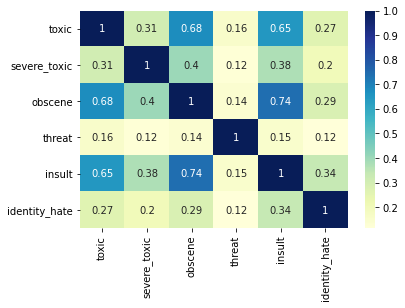

In [6]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [7]:
toxic_df=df[['comment_text','toxic']]

In [8]:
toxic_df[toxic_df['toxic']==0].comment_text.head().values

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       '"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences f

In [9]:
toxic_df[toxic_df['toxic']==1].comment_text.head().values

array(['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK',
       'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...',
       "Bye! \n\nDon't look, come or think of comming back! Tosser.",
       "You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I 

# Text Cleaning 

In [10]:
def clean_data(df,col_to_clean):
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.replace_contractions)
#   Remove Smiles and special chars
#   df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.transform_emojis)
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_special_chars)
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_redundant_spaces)
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_punctuations)
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_exaggerated_words)
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_redundant_newlines)
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_twitter_handles)
  df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_web_links)
#   df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.replace_sign)
  df[col_to_clean] = df[col_to_clean].astype(str)
  df[col_to_clean] = df[col_to_clean].str.lower()
  return df

In [11]:
clean_df = clean_data(df,'comment_text')

In [12]:
clean_df.to_csv('./data/train_clean.csv',index=False,encoding='utf-8')

In [13]:
clean_df.shape

(159571, 8)

In [14]:
clean_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war i...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can not make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [15]:
from df_to_fwf_convertor import FwfConvertor

In [16]:
def list_labels(row):
    label_list = []
    if row['toxic'] == 1:
        label_list.append('toxic')
    if row['severe_toxic'] == 1:
        label_list.append('severe_toxic')
    if row['obscene'] == 1:
        label_list.append('obscene')
    if row['threat'] == 1:
        label_list.append('threat')
    if row['insult'] == 1:
        label_list.append('insult')
    if row['identity_hate'] == 1:
        label_list.append('identity_hate')
    return label_list

In [17]:
df['labels'] = df.apply(lambda x:list_labels(x) , axis=1)

In [18]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,[]
1,000103f0d9cfb60f,d aww he matches this background colour i am ...,0,0,0,0,0,0,[]
2,000113f07ec002fd,hey man i am really not trying to edit war i...,0,0,0,0,0,0,[]
3,0001b41b1c6bb37e,more i can not make any real suggestions on im...,0,0,0,0,0,0,[]
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0,[]
5,00025465d4725e87,congratulations from me as well use the tools...,0,0,0,0,0,0,[]
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0,"[toxic, severe_toxic, obscene, insult]"
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0,0,0,0,0,0,[]
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0,[]
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,[]


In [29]:
label_mapping = {'toxic': '__label__0',
                     'severe_toxic': '__label__1',
                     'obscene': '__label__2',
                     'threat': '__label__3',
                     'insult': '__label__4',
                     'identity_hate': '__label__5'}
FwfConvertor.save_fwf_tr_data(df, 'comment_text', 'labels', label_mapping=label_mapping)

In [30]:
train_fn='/Users/shishirkumar/shishirkmr/Git/data_science/Toxic Comment Classification Challenge/Toxic-Comment-Classification-Challenge/Model Training data.train'
pretrainedvec_fn = '/Users/shishirkumar/jupyter_notebook/NLP/pretrained_models/wiki-news-300d-1M.vec'

In [33]:
%%time
model = fasttext.train_supervised(input=train_fn,
                                  pretrainedVectors=pretrainedvec_fn,
                                  dim=300, 
                                  wordNgrams=2, 
                                  minCount=3, 
                                  epoch=20)

CPU times: user 3min 48s, sys: 13 s, total: 4min 1s
Wall time: 3min 48s


In [36]:
model.predict("this is good",k=-1)

(('__label__0',
  '__label__2',
  '__label__4',
  '__label__1',
  '__label__3',
  '__label__5'),
 array([9.39883947e-01, 5.42413294e-02, 4.77703148e-03, 4.56195645e-04,
        4.17526608e-04, 2.84025446e-04]))

In [20]:
# stop_words=set(stopwords.words("english"))

# df['comment_text']=df['comment_text'].str.lower()

# df['comment_text']=df['comment_text'].str.replace('\n',' ')

# df['sentence']=df['comment_text'].apply(lambda x: sent_tokenize(x))

# df['tokens']=df['comment_text'].apply(lambda x: word_tokenize(x))


In [21]:
# def get_clean_token_list(words):
#     clean_words=[]
#     for word in words:
#         flag=True
#         for letter in word:
#             if letter.isdigit() or letter in string.punctuation:
#                 flag=False
#         if flag:
#             clean_words.append(word)
#     return clean_words

# print(get_clean_token_list(["hewy","ho!w","are","yo6u","?dd","111","qwerty"]))

# def remove_stopwords(words):
#     """
#     pass series get series
#     """
#     filtered_sent=[]
#     for word in words:
#         if word not in stop_words:
#             filtered_sent.append(word)
#     return filtered_sent


# print(remove_stopwords(["hey","how","are","you","?"]))

In [22]:

# df['tokens']=df['tokens'].apply(remove_stopwords)

# df['tokens'].head()

In [23]:
# df['tokens']=df['tokens'].apply(get_clean_token_list)

# df['tokens'].head()

In [24]:
# stem = PorterStemmer()
# wordnet_lemmatizer = WordNetLemmatizer()

# def stem_sentence(sentence):
#     stem_sentence=[]
#     for word in sentence:
#         try:
#             stem_sentence.append(stem.stem(word))
#         except Exception as e:
#             print(e)
#             stem_sentence='ERROR'
#     return stem_sentence

# def lemmatize_sentence(sentence):
#     lem_sentence=[]
#     for word in sentence:
#         try:
#             lem_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
#         except Exception as e:
#             print(e)
#             stem_sentence='ERROR'
#     return lem_sentence

In [25]:
# df.head()

In [26]:
# df['stem_sentence']=df['tokens'].apply(lambda x: stem_sentence(x))

# df['lemm_sentence']=df['tokens'].apply(lambda x: lemmatize_sentence(x))

# df[['tokens','lemm_sentence']].head(10)

In [27]:
# df[df['stem_sentence']=='ERROR'].comment_text.values

In [28]:
# from bs4 import BeautifulSoup
# import re
# import contractions
# import itertools

# class TextCleaningUtils:
#     # text_clean_regex Is a re compile object. Using this will make regex run faster
#     @staticmethod
#     def clean_text_from_regex(text, text_clean_regex):
#         text = text_clean_regex.sub(' ', text).strip()
#         return text

#     @staticmethod
#     def replace_contractions(text):
#         """Replace contractions in string of text"""
#         return contractions.fix(text)

#     @staticmethod
#     def strip_html(text):
#         soup = BeautifulSoup(text, "html.parser")
#         return soup.get_text()

#     @staticmethod
#     def remove_special_characters(text):
#         SPECIAL_CHAR_CLEAN_RE = "[^a-zA-Z0-9\s]+"
#         special_char_clean_regex = re.compile(SPECIAL_CHAR_CLEAN_RE)
#         text = TextCleaningUtils.clean_text_from_regex(text, special_char_clean_regex)
#         return text

#     # TODO: Optimize this to global variable
#     @staticmethod
#     def remove_redundant_space(text):
#         REDUNDANT_SPACES_RE = '\s\s+'
#         redundant_space_regex = re.compile(REDUNDANT_SPACES_RE)
#         text = TextCleaningUtils.clean_text_from_regex(text, redundant_space_regex)
#         return text

#     @staticmethod
#     def remove_web_links(text):
#         HTTP_CLEAN_RE = "(?i)(?:(?:http(?:s)?:)|(?:www\.))\S+"
#         text_clean_regex = re.compile(HTTP_CLEAN_RE)
#         text = TextCleaningUtils.clean_text_from_regex(text, text_clean_regex)
#         return text

#     @staticmethod
#     def remove_twitter_handles(text):
#         TWITTER_CLEAN_RE = "[#@]\S+"
#         text_clean_regex = re.compile(TWITTER_CLEAN_RE)
#         text = TextCleaningUtils.clean_text_from_regex(text, text_clean_regex)
#         return text

#     @staticmethod
#     def remove_redundant_new_lines(text):
#         NEW_LINE_CLEAN_RE = r'[\r|\n|\r\n]+'
#         text_clean_regex = re.compile(NEW_LINE_CLEAN_RE)
#         text = TextCleaningUtils.clean_text_from_regex(text, text_clean_regex)
#         return text

#     @staticmethod
#     def remove_exaggerated_words(text):
#         # Remove over exaggerated words (eg. gooooood)
#         return ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))